In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

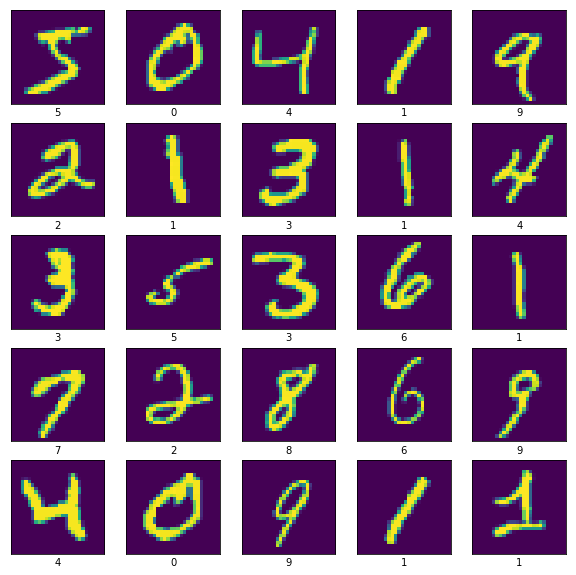

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])
plt.show()

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
x_train = x_train.reshape(60000,784).astype('float32') /255.0
x_test = x_test.reshape(10000,784).astype('float32') /255.0

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [0]:
val_x = x_train[50000:]
val_y = y_train[50000:]
tr_x = x_train[:50000]
tr_y = y_train[:50000]

In [18]:
tr_x.shape

(50000, 784)

In [0]:
tr_rand = np.random.choice(50000, 700)
val_rand = np.random.choice(10000, 300)

tr_x = tr_x[tr_rand]
tr_y = tr_y[tr_rand]
val_x = val_x[val_rand]
val_y = val_y[val_rand]

# 2. 모델 구성하기

In [20]:
model = Sequential()
model.add(Dense(units=64, input_dim = 28*28, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(units=10, activation = 'softmax'))

# 3. 모델 학습과정 설정하기

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기

In [22]:
hist = model.fit(tr_x, tr_y, epochs=1000, batch_size=32, validation_data=(val_x, val_y))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 1s 1ms/step - loss: 2.2954 - acc: 0.1071 - val_loss: 2.2919 - val_acc: 0.1133
Epoch 2/1000
700/700 [==============================] - 0s 72us/step - loss: 2.2080 - acc: 0.2400 - val_loss: 2.2121 - val_acc: 0.2567
Epoch 3/1000
700/700 [==============================] - 0s 72us/step - loss: 2.1233 - acc: 0.3357 - val_loss: 2.1311 - val_acc: 0.3400
Epoch 4/1000
700/700 [==============================] - 0s 69us/step - loss: 2.0342 - acc: 0.4086 - val_loss: 2.0406 - val_acc: 0.4033
Epoch 5/1000
700/700 [==============================] - 0s 68us/step - loss: 1.9381 - acc: 0.4771 - val_loss: 1.9446 - val_acc: 0.4733
Epoch 6/1000
700/700 [==============================] - 0s 75us/step - loss: 1.8324 - acc: 0.5286 - val_loss: 1.8433 - val_acc: 0.5100
Epoch 7/1000
700/700 [============================

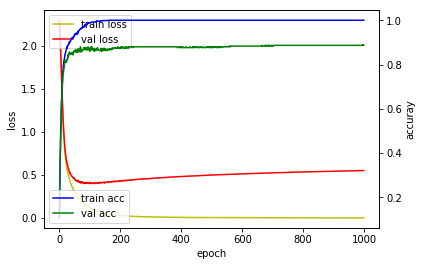

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label = 'val acc')

loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기

In [24]:
loss_and_acc = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation ##')
print(loss_and_acc)

10000/10000 [==============================] - 0s 22us/step
## evaluation ##
[0.6533987367000431, 0.8634]


# 7. 모델 사용하기

In [25]:
xhat = x_test
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[3.0572395e-10 1.3347163e-12 1.2393883e-09 ... 9.9999988e-01
  1.7136955e-08 1.4515656e-07]
 [4.9815066e-05 3.8323201e-08 9.9932981e-01 ... 5.4613471e-12
  4.8711616e-05 3.0424149e-10]
 [3.2355853e-08 9.9770856e-01 4.0191549e-04 ... 1.6042695e-05
  1.5733842e-05 3.6245478e-06]
 ...
 [8.2371902e-13 3.0493018e-11 2.0526890e-12 ... 5.8170201e-08
  4.6668823e-08 1.9748870e-05]
 [1.4508766e-04 1.3267757e-07 8.3073601e-08 ... 4.8716810e-08
  2.5333495e-05 1.7353848e-09]
 [4.6682294e-09 1.5939696e-16 4.6280772e-07 ... 2.9117386e-18
  2.5280277e-13 7.5693566e-12]]


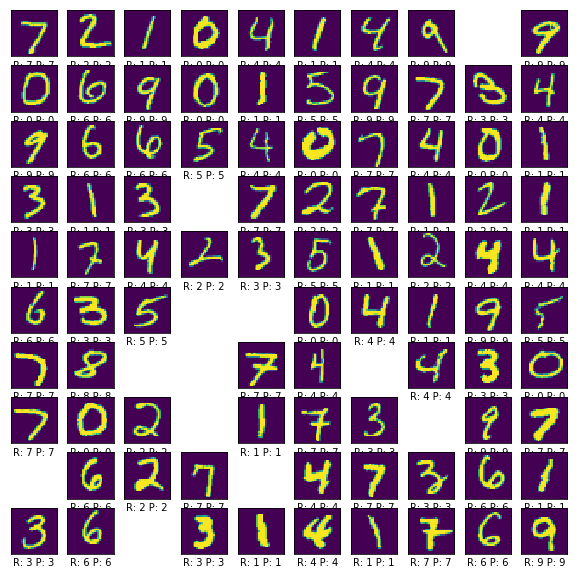

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 0

plt.figure(figsize=(10,10))
for i in range(100):
  if np.argmax(y_test[i]) == np.argmax(yhat[i]):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28,28))
    plt.xlabel('R: ' + str(np.argmax(y_test[i]))+ ' P: ' + str(np.argmax(yhat[i])))
    i += 1

plt.show()